<a href="https://colab.research.google.com/github/snoop2head/OIA_Text_Wrangling/blob/master/_Department_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
from pandas.api.types import CategoricalDtype # 그래프의 값을 정렬해서 보기위해
import numpy as np
print(pd.__version__)
print(np.__version__)

0.25.3
1.17.4


In [168]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
file_name = "_department_t.csv"
path = "/content/gdrive/My Drive/_OIA_Project/" + file_name
df = pd.read_csv(path)
# 데이터의 크기가 어느정도인지 본다.
df.shape

(141, 182)

In [0]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
0,Australian National University,Bond University,Curtin University of Technology,La Trobe University,Monash University,University of New South Wales,University of Queensland,University of Sydney,"University of Technology, Sydney",FH Kufstein Tirol University of Applied Sciences,University of Vienna,Vienna University of Economics and Business,Universite Catholique De Louvain,Brock University,McGill University,Simon Fraser University,University of Alberta,University of British Columbia,University of Manitoba,University of Toronto,York University: Schulich School of Business,Fudan University,Wuhan University,Zhejiang Normal University,Charles University,University of Copenhagen,Aalto University,University of Eastern Finland,University of Helsinki,"University of Jyvaskyla, School of Business & ...",Ecole Superieure du Commerce Exterieur (ESCE),ESC (Business School) Amiens,ESCEM (France Business School) Tours-Poitiers,ISC PARIS - School of Management,KEDGE Business School,Pole ESG-Paris Graduate School of Management,Sciences-Po,Eberhard Karls Universitat Tubingen,European Business School,Freie Universitat Berlin,...,SUNY at Stony Brook,Syracuse University,Temple University,Towson University,University of Akron,University of Alabama,University of California Berkeley,University of California Davis,University of California Irvine,University of California Los Angeles,University of California Riverside,University of California San Diego,University of California Santa Barbara,University of California Santa Cruz,University of Connecticut,University of Georgia,University of Hawaii at Manoa,University of Illinois at Urbana-Champaign,University of Maryland at College Park,University of Massachusetts Amherst,University of Michigan,University of Minnesota Morris,University of North Carolina at Chapel Hill,University of North Carolina at Greensboro,University of Oregon,University of Pennsylvania,University of Pittsburgh,University of Richmond,University of Scranton,University of South Florida,University of Tennessee Knoxville,University of Texas at Arlington,University of Utah,University of Washington,University of Wisconsin-Madison,Washington College,Washington University in St. Louis,Western Kentucky University,Western Washington University,Westminster College
1,UD IS,경영학,경영학,경영학,UIC,GSIS,InformationandInteractionDesign,UD PSIR,UIC TAD,경영학,경영학,경영학,경영학,감호학,건축공학,EIC,"InternationalTrade,FinanceandManagement",UIC,건축공학,Psychology,경영학원,GSIS,경영학,GSIS,건축공학,UD CLC,경영학,경영학,경제학,경영학,UIC,경영학,경영학,UIC ASD,EIC,경영학,GSIS,경영학,경영학,철학,...,UD Economics,UD Economics,CTM,경영학,건축학,건축학,UIC ASD,EIC,UD Economics,UIC,SchoolofBusiness,BioConvergence,UD CLC,UD Economics,경영학,UD Economics,UD CLC,EESE,UD PSIR,건축공학,경영학,간호학,경영학,경영학,경영학,UIC,경영학,경영학,UIC ASD,경영학,경영학,간호학,EESE,UD Economics,UIC,경영학,UD Economics,UD Economics,UD Economics,경영학
2,경영학,경제학,경제학,경영학,UIC,건축학,건축공학,UD CLC,건축공학,경영학,경제학,경영학,경영학,경영학,경영학,경영학,건축학,경영학,건축학,UIC,경영학,경영학,경영학,경영학,경영학,UD Economics,경영학,공대학세라믹공학,경제학,경영학,UIC,경영학,경영학,UD Economics,경영학,경영학,UD CLC,경제학,경영학,경영학,...,건축공학,건축학,UIC CTM,경영학,경영학,경영학,EIC,TAD,UD Economics,UnderwoodInternational,UIC,UD IS,EastAsiaInternationalCollege,Politics,경영학,경영학,UIC,건축공학,UD PSIR,경영학,경영학,경영학/경제,경영학,경영학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,건축공학,경영학,UIC LSBT,UIC ASD,경영학,UIC ASD,건축공학,경영학,경영학
3,경제학,경제학,국어국문,교육학,경영학,경영학,경영학,UIC ASD,건축학,경영학,경제학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UIC,경영학,경영학,경영학,경영학,경영학,UnderwoodDivision,경영학,교육학,교육학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,UD Economics,독어독문,경영학,교육학,...,경영학,경영학,경영학,경영학,경영학,경영학,UD,UIC,UIC QRM,건축학,UD IS,Techno-ArtDivision,UD CLC,경영학,경영학,경영학,UIC ASD,건축학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,경영학
4,경제학,국어국문,사회학,교육학,경영학,경영학,경

In [0]:
df.columns = df.iloc[0]

In [0]:
header_list = df.columns.to_list()

In [0]:
df = df[1:]
df

,Australian National University,Bond University,Curtin University of Technology,La Trobe University,Monash University,University of New South Wales,University of Queensland,University of Sydney,"University of Technology, Sydney",FH Kufstein Tirol University of Applied Sciences,University of Vienna,Vienna University of Economics and Business,Universite Catholique De Louvain,Brock University,McGill University,Simon Fraser University,University of Alberta,University of British Columbia,University of Manitoba,University of Toronto,York University: Schulich School of Business,Fudan University,Wuhan University,Zhejiang Normal University,Charles University,University of Copenhagen,Aalto University,University of Eastern Finland,University of Helsinki,"University of Jyvaskyla, School of Business & Economics",Ecole Superieure du Commerce Exterieur (ESCE),ESC (Business School) Amiens,ESCEM (France Business School) Tours-Poitiers,ISC PARIS - School of Management,KEDGE Business School,Pole ESG-Paris Graduate School of Management,Sciences-Po,Eberhard Karls Universitat Tubingen,European Business School,Freie Universitat Berlin,...,SUNY at Stony Brook,Syracuse University,Temple University,Towson University,University of Akron,University of Alabama,University of California Berkeley,University of California Davis,University of California Irvine,University of California Los Angeles,University of California Riverside,University of California San Diego,University of California Santa Barbara,University of California Santa Cruz,University of Connecticut,University of Georgia,University of Hawaii at Manoa,University of Illinois at Urbana-Champaign,University of Maryland at College Park,University of Massachusetts Amherst,University of Michigan,University of Minnesota Morris,University of North Carolina at Chapel Hill,University of North Carolina at Greensboro,University of Oregon,University of Pennsylvania,University of Pittsburgh,University of Richmond,University of Scranton,University of South Florida,University of Tennessee Knoxville,University of Texas at Arlington,University of Utah,University of Washington,University of Wisconsin-Madison,Washington College,Washington University in St. Louis,Western Kentucky University,Western Washington University,Westminster College
1,UD IS,경영학,경영학,경영학,UIC,GSIS,InformationandInteractionDesign,UD PSIR,UIC TAD,경영학,경영학,경영학,경영학,감호학,건축공학,EIC,"InternationalTrade,FinanceandManagement",UIC,건축공학,Psychology,경영학원,GSIS,경영학,GSIS,건축공학,UD CLC,경영학,경영학,경제학,경영학,UIC,경영학,경영학,UIC ASD,EIC,경영학,GSIS,경영학,경영학,철학,...,UD Economics,UD Economics,CTM,경영학,건축학,건축학,UIC ASD,EIC,UD Economics,UIC,SchoolofBusiness,BioConvergence,UD CLC,UD Economics,경영학,UD Economics,UD CLC,EESE,UD PSIR,건축공학,경영학,간호학,경영학,경영학,경영학,UIC,경영학,경영학,UIC ASD,경영학,경영학,간호학,EESE,UD Economics,UIC,경영학,UD Economics,UD Economics,UD Economics,경영학
2,경영학,경제학,경제학,경영학,UIC,건축학,건축공학,UD CLC,건축공학,경영학,경제학,경영학,경영학,경영학,경영학,경영학,건축학,경영학,건축학,UIC,경영학,경영학,경영학,경영학,경영학,UD Economics,경영학,공대학세라믹공학,경제학,경영학,UIC,경영학,경영학,UD Economics,경영학,경영학,UD CLC,경제학,경영학,경영학,...,건축공학,건축학,UIC CTM,경영학,경영학,경영학,EIC,TAD,UD Economics,UnderwoodInternational,UIC,UD IS,EastAsiaInternationalCollege,Politics,경영학,경영학,UIC,건축공학,UD PSIR,경영학,경영학,경영학/경제,경영학,경영학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,건축공학,경영학,UIC LSBT,UIC ASD,경영학,UIC ASD,건축공학,경영학,경영학
3,경제학,경제학,국어국문,교육학,경영학,경영학,경영학,UIC ASD,건축학,경영학,경제학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UIC,경영학,경영학,경영학,경영학,경영학,UnderwoodDivision,경영학,교육학,교육학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,UD Economics,독어독문,경영학,교육학,...,경영학,경영학,경영학,경영학,경영학,경영학,UD,UIC,UIC QRM,건축학,UD IS,Techno-ArtDivision,UD CLC,경영학,경영학,경영학,UIC ASD,건축학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UD Economics,경영학,경영학,경영학,경영학,경영학,경영학
4,경제학,국어국문,사회학,교육학,경영학,경영학,경영학,UIC,건축학,경영학,경제학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UIC,경영학,경영학,경영학,교육학,경영학,건축학,경영학,교육학,나노학공학,경영학,UD IS,경영학,경영학,경영학,경영학,경제학,NaN,독어독문,경영학,독어독문,...,경영학,경영학,경영학,경영학,경영학,경제학,UD 경제,UIC,경영학,경영학,경영학,UD Economics,UD IS,경영학,경영학,경영학,UD IS,건축학,경영학,경영학,경영학,경영학,경영학,경영학,경영학,UD CLC,경제학

In [0]:
import numpy as np

def single_dp_dict(df_column):
  # university_name = df_column[0]
  single_column = df_column[0:]
  single_column_list = single_column.to_list()
  column_lst_without_nan = [x for x in single_column_list if x == x]

  splitted_list = []
  for i in column_lst_without_nan:
    if "/" in i:
      # print(i)
      double_element = i.split("/")
      # print(double_element)
      # splitted_list.remove(i)
      splitted_list += double_element
    elif "," in i:
      double_element = i.split(",")
      splitted_list += double_element
    else:
      splitted_list.append(i)
      pass
  splitted_list

  from collections import defaultdict
  fq= defaultdict( int )
  for w in splitted_list:
      fq[w] += 1
  number_of_departments = len(splitted_list)
  # print(number_of_departments)
  # print(university_name)
  dictionary = dict(fq)
  return dictionary

In [0]:
from statistics import variance

# df_column = df[header_list[25]]
# df_column1 = df['Aalto University']
# # single_dict = single_dp_dict(df_column1)
# print(single_dict)

no_of_students('Aalto University')

# variance1 = variance(single_dict[k] for k in single_dict)

# df_column2 = df['York University: Schulich School of Business']
# single_dict = single_dp_dict(df_column2)
# print(single_dict)

# variance2 = variance(single_dict[k] for k in single_dict)
# print(variance1, variance2)


72

In [0]:
def fn_univ_variance(univ_name):
  df_column = df[univ_name]
  single_dict = single_dp_dict(df_column)
  var = variance(single_dict[k] for k in single_dict)
  return var

def no_of_students(univ_name):
  df_column = df[univ_name]
  # print(df_column)
  single_dict = single_dp_dict(df_column)
  # print(single_dict)
  no_of_students = sum(single_dict[k] for k in single_dict)
  return no_of_students

def no_of_departments(univ_name):
  df_column = df[univ_name]
  # print(df_column)
  single_dict = single_dp_dict(df_column)
  no_of_departments = len(single_dict)
  return no_of_departments


In [0]:
# list_of_dict = []
# for i in header_list:
#   df_column = df[i]
#   single_dict = single_dp_dict(df_column)
#   list_of_dict.append(single_dict)
# department_matrix = pd.DataFrame(list_of_dict)
# department_matrix.fillna(0)

# department_matrix.to_csv("/content/gdrive/My Drive/_OIA_Project/_department_matrix_mark4.csv",index=False,encoding="utf-8")

In [0]:
# department_matrix.plot.hist()

In [0]:
# p = r'.*(UD|Econ|UIC).*'
# finance = df[df['title'].str.match(p) |
#            df['content'].str.match(p, flags=re.MULTILINE)]
# finance.shape

In [180]:
var_list = []
for univ in header_list:
  var = fn_univ_variance(univ)
  students_no = no_of_students(univ)
  department_no = no_of_departments(univ)
  var_dict = {'name':univ,
              'variance':var,
              'no_of_students':students_no,
              'no_of_departments':department_no}
  var_list.append(var_dict)

depart_var_df = pd.DataFrame(var_list)
depart_var_df
# depart_var_df.to_csv("/content/gdrive/My Drive/_OIA_Project/_department_var_df_mark1.csv",index=False,encoding="utf-8")

,name,variance,no_of_students,no_of_departments
0,Australian National University,0.882353,27,17
1,Bond University,0.401099,19,14
2,Curtin University of Technology,0.131868,16,14
3,La Trobe University,1.897436,22,13
4,Monash University,1.747036,40,23
...,...,...,...,...
177,Washington College,0.980952,23,15
178,Washington University in St. Louis,4.576923,25,13
179,Western Kentucky University,1.435897,20,13
180,Western Washington University,1.435897,19,13


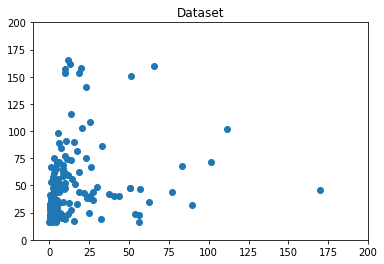

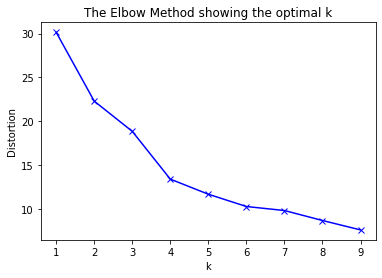

In [200]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = training_df['var'] #this is x axis
x2 = training_df['size'] #this is y axis

plt.plot()
plt.xlim([-10, 200])
plt.ylim([0, 200])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plotting the elow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

[[ 71.29906902  45.4375    ]
 [  4.54769559  27.60909091]
 [ 23.85881058 147.63636364]
 [ 10.22869682  65.28888889]]


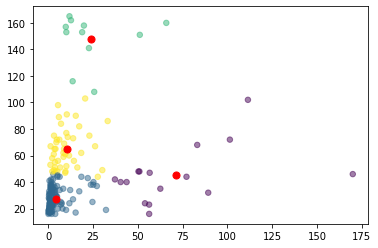

In [205]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#variance as x axis
#number of students as y axis
training_df = pd.concat([depart_var_df['variance'], depart_var_df['no_of_students']], axis=1, keys=['var', 'size'])


kmeans = KMeans(n_clusters=4).fit(training_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(training_df['var'], training_df['size'], c= kmeans.labels_.astype(float), s=30, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)